<a href="https://colab.research.google.com/github/Chien-Klein/Cryptocurrency-Prediction/blob/master/coin_price_prediction_using_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving bitcoin__btc.csv to bitcoin__btc.csv


In [2]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("bitcoin__btc.csv")
print('Data size:', df.shape)
df.head()

Data size: (4704, 19)


,date,transactions,send_usd,hashrate,median_transaction_size,market_cap,active_addresses,median_transaction_value,google_trends,top_100_percent,sent_addresses,mining_profitability,block_size,confirmation_time,fee_reward,tweets,av_transaction_value,av_transaction_size,difficulty
0,1/3/2009,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,204.0,0.0,0.0,0,0.0,0,1.0
1,1/4/2009,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
2,1/5/2009,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
3,1/6/2009,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
4,1/7/2009,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0


In [3]:
(num_row, num_column) = df.shape
print('Number of rows: ',num_row)
num_train =  4600
num_test = num_row - num_train

Number of rows:  4704


In [4]:
df = df.replace(r'NaN', np.nan, regex=True)

In [5]:
training_set = df.iloc[:num_train, 1:2].values
test_set = df.iloc[num_train:, 1:2].values
# print(training_set)
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# print(training_set_scaled)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, num_train):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(y_train.shape)

(4540, 60)
(4540,)


In [6]:
print(X_train.shape)
print(y_train.shape)
print(sc)

(4540, 60, 1)
(4540,)
MinMaxScaler()


In [7]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [9]:
# Fitting the RNN to the Training set if the data has never been trained 
import os.path
from os import path
path_name = 'Bitcoin_PricePredict.h5'
if path.exists(path_name):
  print('Data had been trained, loading weights')
  model.load_weights(path_name)
else:
  print('Start training data')
  model.fit(X_train, y_train, epochs = 100, batch_size = 32)
  model.save(path_name)

Start training data
Epoch 1/100
142/142 [==============================] - 25s 123ms/step - loss: 0.0088
Epoch 2/100
142/142 [==============================] - 18s 125ms/step - loss: 0.0041
Epoch 3/100
142/142 [==============================] - 18s 125ms/step - loss: 0.0039
Epoch 4/100
142/142 [==============================] - 17s 123ms/step - loss: 0.0035
Epoch 5/100
142/142 [==============================] - 18s 124ms/step - loss: 0.0033
Epoch 6/100
142/142 [==============================] - 18s 125ms/step - loss: 0.0035
Epoch 7/100
142/142 [==============================] - 18s 124ms/step - loss: 0.0033
Epoch 8/100
142/142 [==============================] - 18s 124ms/step - loss: 0.0031
Epoch 9/100
142/142 [==============================] - 18s 125ms/step - loss: 0.0030
Epoch 10/100
142/142 [==============================] - 18s 124ms/step - loss: 0.0029
Epoch 11/100
142/142 [==============================] - 18s 124ms/step - loss: 0.0032
Epoch 12/100
142/142 [=====================

(103, 60, 1)


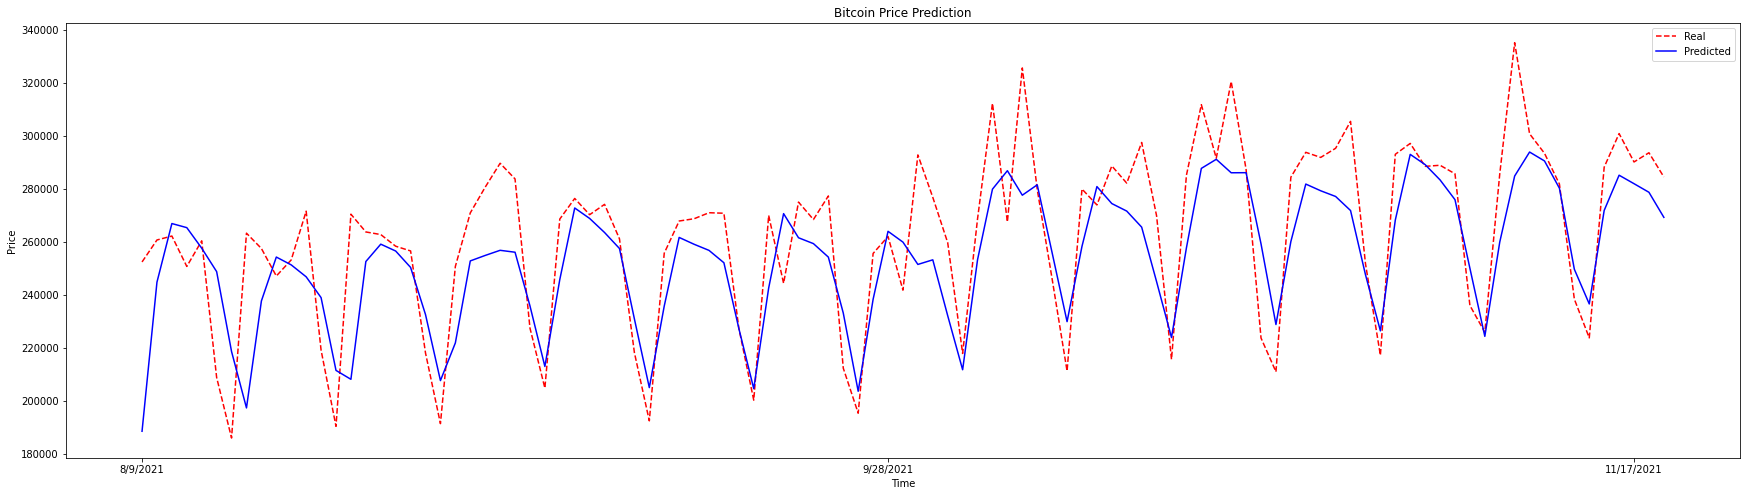

In [10]:
# Getting the predicted 
dataset_train = df.iloc[:num_train, 1:2]
dataset_test = df.iloc[num_train+1:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 60 + num_test-1):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

predicted_stock_price = model.predict(X_test)
#print(predicted_stock_price)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
#print('after inverse transform:', predicted_stock_price)
# Visualising the results
plt.figure(figsize=(30,8))
plt.plot(df.loc[num_train+1:, 'date'],dataset_test.values, 'r--', label = 'Real')
plt.plot(df.loc[num_train+1:, 'date'],predicted_stock_price, 'b', label = 'Predicted')
plt.xticks(np.arange(0,num_test,50))
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
#plt.figure(figsize=(1,1))
#plt.rcParams['figure.figsize'] = [10, 5]
plt.show()


In [13]:
MAPE = np.abs(predicted_stock_price - dataset_test.values)
RMSE = np.multiply(MAPE,MAPE)
RMSE = math.sqrt(np.mean(RMSE))/np.mean(dataset_test.values)
MAE = np.mean(MAPE)/np.mean(dataset_test.values)
MAPE = np.divide(MAPE,dataset_test.values)
MAPE = np.mean(MAPE)
print('MAPE = ',MAPE)
print('MAE = ', MAE*100, '%')
print('RMSE = ',RMSE*100, '%')


MAPE =  0.065591331955681
MAE =  6.539511475505713 %
RMSE =  8.348836319253431 %
